In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cv.__version__

'4.6.0'

In [ ]:
# From: https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
# To: /content/images.zip

# Download and unzip our images
# Code:
# !gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
# !unzip -qq images.zip

In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/elephant.jpg')

In [ ]:
def imshow(title="", image=None, axis=False):
  plt.imshow(img[:, :, ::-1])
  plt.title(title)
  plt.axis(axis)
  plt.show()

In [ ]:
# imshow('Elephent image', img)

In [ ]:
cv.imwrite("output.png", img)

True

In [2]:
def imshow(image=None, title="", size=10,  axis=False):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w / h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis(axis)
  plt.show()

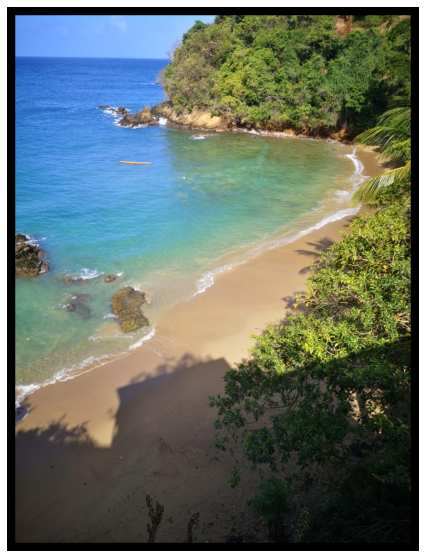

In [12]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/castara.jpeg')
# imshow(img, 'Castara Tobago')
B, G, R = cv.split(img)
B, G, R = np.pad(B, (20, 20)), np.pad(G, (20, 20)), np.pad(R, (20, 20))
merged = cv.merge([B, G, R])
imshow(merged)

In [4]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# imshow(img_gray, 'GrayScale')

In [ ]:
zeros = np.zeros(img.shape[:2], dtype=np.uint8)
B, G, R = cv.split(img)
# imshow(cv.merge([zeros, zeros, R]), "Red")
# imshow(cv.merge([zeros, G, zeros]), "Green")
# imshow(cv.merge([B, zeros, zeros]), "Blue")

In [ ]:
# merged = cv.merge([B, G, R])
# merged = cv.merge([B+100, G, R])
# imshow(merged, "Merged")

In [ ]:
img_HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# imshow(img_HSV)

In [ ]:
# imshow(img_HSV[:, :, 0], 'Hue: Color range')
# imshow(img_HSV[:, :, 1], 'Saturation: Where whiter because have higher value')
# imshow(img_HSV[:, :, 2], 'Value: intensity of brightness of image')

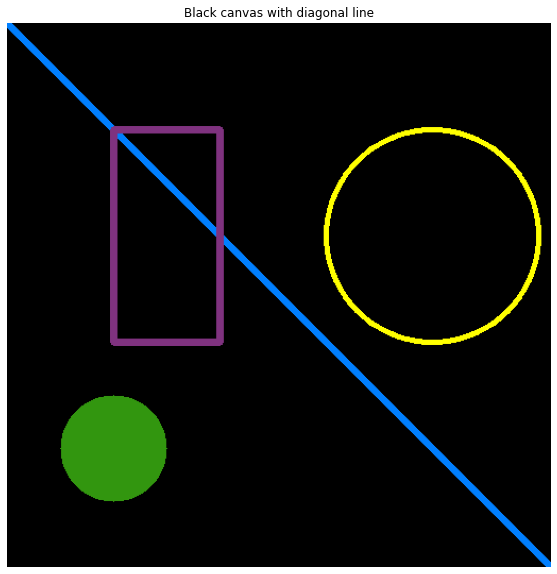

In [ ]:
img = np.zeros((512, 512, 3), np.uint8)
img_gray = np.zeros((512, 512), np.uint8)

cv.line(img, (0, 0), (512, 512), (255, 127, 0), 5)
# imshow(img, "Black canvas with diagonal line")
cv.rectangle(img, (100, 100), (200, 300), (127, 50, 127), 5)
cv.circle(img, (400, 200), 100, (0, 255, 255), 3)
cv.circle(img, (100, 400), 50, (15, 150, 50), -1)
# cv.circle(img, (100, 400), 50, (255, 0, 255), 3)
imshow(img, "Black canvas with diagonal line")

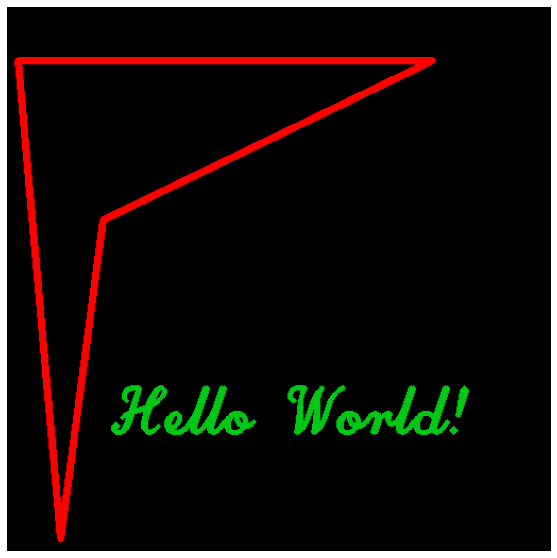

In [ ]:
img = np.zeros((512, 512, 3), np.uint8)
pts = np.array([[10, 50],
                [400, 50],
                [90, 200],
                [50, 500]])
# add extra dimention  not important!!
pts = pts.reshape((-1, 1, 2))
cv.polylines(img, [pts], True, (0, 0, 255), 5)

string = 'Hello World!'
# cv.putText(img, string, [100, 400], cv.FONT_HERSHEY_SIMPLEX, 2, (20, 200, 0), 4)
cv.putText(img, string, [100, 400], cv.FONT_HERSHEY_SCRIPT_COMPLEX, 2, (20, 200, 0), 3)
imshow(img)

Transformatin: Translation, rotation

In [15]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/Volleyball.jpeg')
# imshow(img, "Orginal")

h, w = img.shape[:2]
T = np.float32([
    [1, 0, h/4],
    [0, 1, h/4]
])
img_translation = cv.warpAffine(img, T, (w, h))
# imshow(img_translation, "Translated32")

# T_rotation = cv.getRotationMatrix2D((w/2, h/2), 90, 1)
T_rotation = cv.getRotationMatrix2D((w/2, h/2), 45, 0.5) # get whole image 
img_rotated = cv.warpAffine(img, T_rotation, (w, h))
img_rotated2 = cv.transpose(img)
img_flip = cv.flip(img, 1)
# imshow(img_rotated, "Rotated")

interplation flags:

INTER_NEAREST
INTER_LINEAR
INTER_AREA
INTER_NEAREST 
INTER_CUBIC
INTER_LANCZOS4

In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/oxfordlibrary.jpeg')

img_resized1 = cv.resize(img, None, fx=0.75, fy=0.75)
# imshow(img_resized1, "Linear interpolation")

img_resized2 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
# imshow(img_resized2, "Inter cubic")

img_resized3 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_NEAREST)
# imshow(img_resized3, "Inter nearest")

img_resized4 = cv.resize(img, (900, 400), interpolation=cv.INTER_AREA)
# imshow(img_resized4, "Inter Area")

In [16]:
smaller = cv.pyrDown(img) # resize image by half
larger = cv.pyrUp(smaller) # revert the pyDown to orginal image but image lose some detail and become blurry
# imshow(img, axis=True)
# imshow(smaller, axis=True)
even_smaller = cv.pyrDown(smaller)

Arithmetic and Bitwise

In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/liberty.jpeg', cv.IMREAD_GRAYSCALE)
# imshow(img, "GrayScale liberty")
M = np.ones(img.shape, dtype=np.uint8) * 100

# add number to every pixel if you want brighter image 
added = (img + M)    # if a pixel value pass 255 then start from zero and become dark
added2 = cv.add(img, M)
# imshow(added, 'add Brightness with numpy')
# imshow(added2, 'add Brightness with cv2')

# subtract number to every pixel if you want darker image
# subtracted = cv.subtract(img, M)

In [ ]:
square = np.zeros((300, 300), dtype=np.uint8)
cv.rectangle(square, (50, 50), (250,250), 255, -1)
# imshow(square, "Square")
ellipse = np.zeros((300, 300), dtype=np.uint8)
cv.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
# imshow(ellipse, "ellipse")

And = cv.bitwise_and(square, ellipse)
Or = cv.bitwise_or(square, ellipse)
Not = cv.bitwise_not(square)
Xor = cv.bitwise_xor(square, ellipse)
# imshow(And, "And", axis=True)
# imshow(Or, "Or", axis=True)
# imshow(Not, "Not", axis=True)
# imshow(Xor, "Xor", axis=True)

Convolution, Blurring, sharpening

In [17]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/flowers.jpeg')
# imshow(img)

kernel_3x3 = np.ones((3, 3)) / 9 # we want element wise multiplication so for meadian we must divid the matrix by it's size square
blurred = cv.filter2D(img, -1, kernel_3x3)
# imshow(blurred, "Blurred flowers: kernel 3x3")

kernel_7x7 = np.ones((7, 7)) / 49
blurred = cv.filter2D(img, -1, kernel_7x7)
# imshow(blurred, "Blurred flowers: kernel 7x7")

# larger kernel cause more blurrery image

In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/flowers.jpeg')
# imshow(img)

# cv.blur function blured image by averaging the pixels around the target pixel
# this process done by convoluve with nomilize kernel
blur = cv.blur(img, (5, 5))
# imshow(blur, 'Blur')

# instead of box filter, guassian filter
Gaussian = cv.GaussianBlur(img, (5, 5), 0)
# imshow(Gaussian, 'Gausian Blured')

median = cv.medianBlur(img, 5)
# imshow(median, 'Median Blured')

In [ ]:
# bilateral is very powerful in noise removal while keeping edges sharp
bilateral = cv.bilateralFilter(img, 9, 75, 75)
# imshow(bilateral)



*   cv.fastNlMeansDenoising() - work with single grayscale image
*   cv.fastNlMeansDenoisingColored() - work with color image
*   cv.fastNlMeansDenoisingMulti() - worl with image sequence captured in short period of time
*   cv.fastNlMeansDenoisingColoredMulti() - same as above but color images


In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/hilton.jpeg')
# imshow(img)

dst = cv.fastNlMeansDenoisingColored(img, None, 6, 6, 7, 21)
# imshow(dst)

In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/hilton.jpeg')
# imshow(img)

kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])
sharpened = cv.filter2D(img, -1, kernel)
# imshow(sharpened, "sharpen: kernel 3x3")

Threshholding, Binarization, Adaptive thresholding

In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/hilton.jpeg')
# image = np.arange(255).reshape(1, 255)
# image = np.repeat(image, 255, axis=0)
# plt.imshow(image<127, cmap='gray')

In [ ]:
img = cv.imread('/content/drive/MyDrive/Old-book-scanned.jpg')
# imshow(img, "Orginal")

# value below 127 goes 0 and above goes 255
ret , thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# imshow(thresh1, "Binary Threshhold")

ret , thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
# imshow(thresh2, "Binary_INV Threshhold")

ret , thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
# imshow(thresh3, "Trunc Threshhold")

ret , thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
# imshow(thresh4, "TOZERO Threshhold")

ret , thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
# imshow(thresh5, "TOZERO_inv Threshhold")

In [ ]:
# Adaptive
img = cv.imread('/content/drive/MyDrive/Old-book-scanned.jpg', 0)
# imshow(img, "Orginal")

# first we blured image to remove some nois
img_blur = cv.GaussianBlur(img, (3, 3), 0)

thresh1 = cv.adaptiveThreshold(img_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, 5)
# imshow(thresh1, "AdaptiveThreshold Threshhold")

_ , thresh2 = cv.threshold(img_blur, 200, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# imshow(thresh2, "THRESH_OTSU Threshhold")

In [ ]:
from skimage.filters import threshold_local

# We get the value component from the hsv color space

img = cv.imread('/content/drive/MyDrive/Old-book-scanned.jpg')
# imshow(img, "Orginal")

img_blur = cv.GaussianBlur(img, (3, 3), 0)
V = cv.split(cv.cvtColor(img_blur, cv.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method='gaussian')

thresh = (V > T).astype(np.uint8) * 255
# imshow(thresh, "threshold_local")

Dilation, erosion, opening, closing, canny edge detection

*   Dilation: add pixel to the boundry of the object in the image
*   Erosion: removes pixel at the boundry of the object in the image
*   Opening: Erosion followed by Dilation
*   Closing: Dilation followed by Erosion

In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/opencv_inv.png')
# imshow(img)

kernel = np.ones((5, 5), dtype=np.uint8)
erosion = cv.erode(img, kernel)
# imshow(erosion, "Eroded")

dilate = cv.dilate(img, kernel)
# imshow(dilate, "Dilated")

opened = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
# imshow(opened, "Opened")

closed = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
# imshow(closed, "Closed")

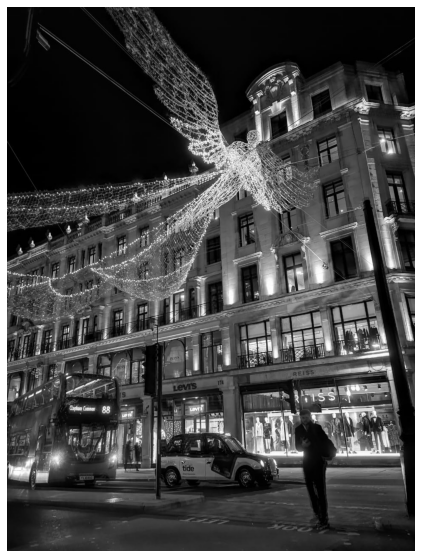

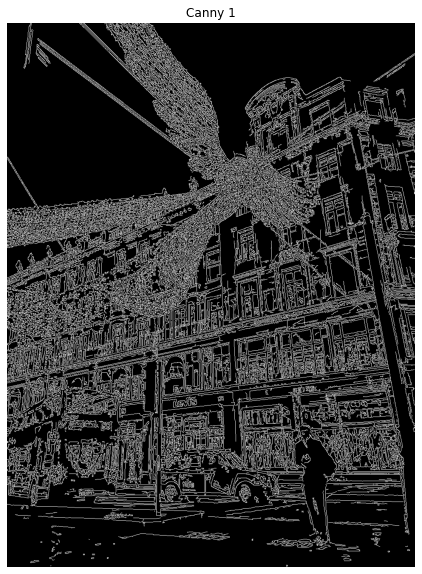

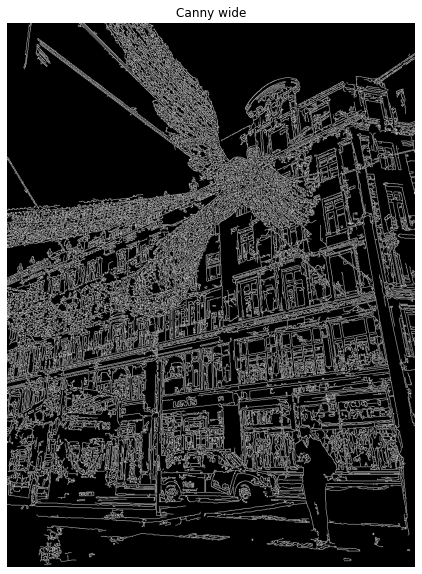

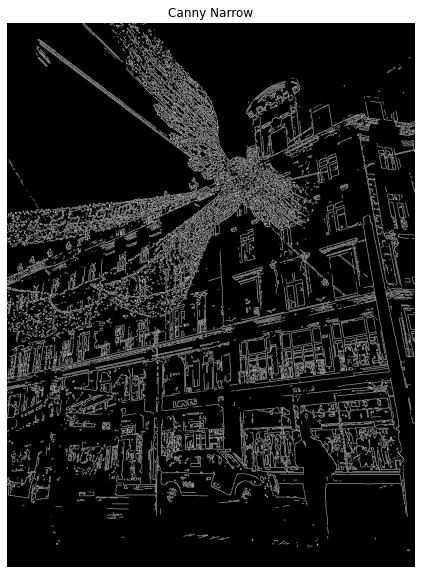

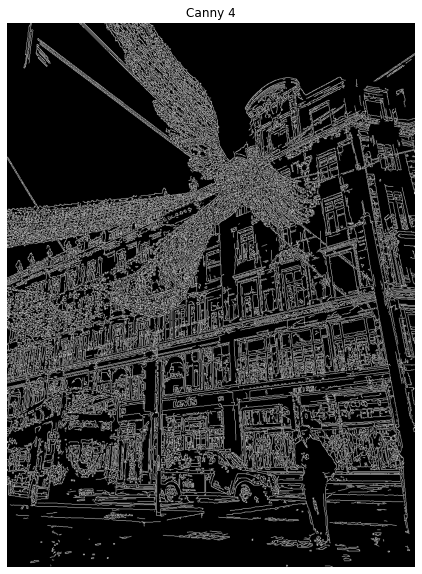

In [ ]:
img = cv.imread('/content/drive/MyDrive/images_modernComputerVision/londonxmas.jpeg', 0)
imshow(img)

canny = cv.Canny(img, 50, 120)
imshow(canny, "Canny 1")

canny = cv.Canny(img, 10, 200)
imshow(canny, "Canny wide")

canny = cv.Canny(img, 200, 240)
imshow(canny, "Canny Narrow")

canny = cv.Canny(img, 60, 110)
imshow(canny, "Canny 4")